In [1]:
import os
import numpy as np
from cmdstanpy import cmdstan_path, CmdStanModel

import arviz as az
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow_probability.substrates import numpy as tfp
tfd = tfp.distributions

In [2]:
import cmdstanpy
cmdstanpy.install_cmdstan()

Installing CmdStan version: 2.31.0
Install directory: /Users/andrea/.cmdstan
CmdStan version 2.31.0 already installed


True

In [13]:
import pandas as pd

source = "../Dataset/house.csv"
df = pd.read_csv(source)
df = df.loc[:, ["price", "Overall.Qual", "Half.Bath", "Garage.Area", "Total.Bsmt.SF", "X1st.Flr.SF",
                "Yr.Sold", "Year.Built",  "Mas.Vnr.Area", "TotRms.AbvGrd", "Fireplaces",
                "Wood.Deck.SF", "Full.Bath", "Mo.Sold"]]
df = df.assign(AgeOfHouse= (df.loc[:, "Yr.Sold"] - df.loc[:, "Year.Built"]))
df = df.assign(SaleMonth= ((df.loc[:, "Yr.Sold"]-2006)*12 + df.loc[:, "Mo.Sold"]))
df = df.dropna()
df

price  Overall.Qual  Half.Bath  Garage.Area  Total.Bsmt.SF  \
0     215000             6          0        528.0         1080.0   
1     105000             5          0        730.0          882.0   
2     172000             6          1        312.0         1329.0   
3     244000             7          1        522.0         2110.0   
4     189900             5          1        482.0          928.0   
...      ...           ...        ...          ...            ...   
2898  142500             6          0        588.0         1003.0   
2899  131000             5          0        484.0          864.0   
2900  132000             5          0          0.0          912.0   
2901  170000             5          0        418.0         1389.0   
2902  188000             7          1        650.0          996.0   

      X1st.Flr.SF  Yr.Sold  Year.Built  Mas.Vnr.Area  TotRms.AbvGrd  \
0            1656     2010        1960         112.0              7   
1             896     2010        1961           0.0              5   
2            1329     2010        1958         108.0              6   
3            2110     2010        1968           0.0              8   
4             928     2010        1997           0.0              6   
...           ...      ...         ...           ...            ...   
2898         1003     2006        1984           0.0              6   
2899          902     2006        1983           0.0              5   
2900          970     2006        1992           0.0              6   
2901         1389     2006        1974           0.0              6   
2902          996     2006        1993          94.0              9   

      Fireplaces  Wood.Deck.SF  Full.Bath  Mo.Sold  AgeOfHouse  SaleMonth  
0              2           210          1        5          50         53  
1              0           140          1        6          49         54  
2              0           393          1        6          52         54  
3              2             0          2        4          42         52  
4              1           212          2        3          13         51  
...          ...           ...        ...      ...         ...        ...  
2898           0           120          1        3          22          3  
2899           0           164          1        6          23          6  
2900           0            80          1        7          14          7  
2901           1           240          1        4          32          4  
2902           1           190          2       11          13         11  

[2903 rows x 16 columns]

In [16]:
stan_model = CmdStanModel(stan_file="./bsts-month.stan")

11:08:14 - cmdstanpy - INFO - compiling stan file /Users/andrea/Library/CloudStorage/OneDrive-Personal/Documenti/University/Note e file corsi/Bayesian Statistics/Bayesian Statistics Project/Bayesian Structural Time Series/bsts-month.stan to exe file /Users/andrea/Library/CloudStorage/OneDrive-Personal/Documenti/University/Note e file corsi/Bayesian Statistics/Bayesian Statistics Project/Bayesian Structural Time Series/bsts-month
INFO:cmdstanpy:compiling stan file /Users/andrea/Library/CloudStorage/OneDrive-Personal/Documenti/University/Note e file corsi/Bayesian Statistics/Bayesian Statistics Project/Bayesian Structural Time Series/bsts-month.stan to exe file /Users/andrea/Library/CloudStorage/OneDrive-Personal/Documenti/University/Note e file corsi/Bayesian Statistics/Bayesian Statistics Project/Bayesian Structural Time Series/bsts-month
DEBUG:cmdstanpy:cmd: make /tmp/tmpib2auusz/tmpprs8wmwo
cwd: /Users/andrea/.cmdstan/cmdstan-2.31.0
DEBUG:cmdstanpy:Console output:

--- Translating St

In [25]:
features = df.loc[:, ["Overall.Qual", "Garage.Area", "Total.Bsmt.SF", "X1st.Flr.SF",
                "AgeOfHouse",  "Mas.Vnr.Area", "TotRms.AbvGrd", "Fireplaces",
                "Wood.Deck.SF", "Full.Bath"]]
                
data = {
    "N": df.shape[0],
    "p": features.shape[1],
    "Y": np.log(df.loc[:, "price"]),
    "X": features,
    "month": df.loc[:, "SaleMonth"],
    "tau_ss": 0.1,
    "c_ss": 100,
    "sigma_max": 200
}

stan_fit = stan_model.sample(data=data, chains=6, 
                             parallel_chains=6, 
                             iter_warmup=2500, iter_sampling=15000, thin=1)

cmdstanpy_data = az.from_cmdstanpy(stan_fit)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5g5_80b0/mrp0iouk.json
DEBUG:cmdstanpy:cmd: /Users/andrea/Library/CloudStorage/OneDrive-Personal/Documenti/University/Note e file corsi/Bayesian Statistics/Bayesian Statistics Project/Bayesian Structural Time Series/bsts-month info
cwd: None
11:36:47 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

chain 5 |          | 00:00 Status

chain 6 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/Users/andrea/Library/CloudStorage/OneDrive-Personal/Documenti/University/Note e file corsi/Bayesian Statistics/Bayesian Statistics Project/Bayesian Structural Time Series/bsts-month', 'id=4', 'random', 'seed=40941', 'data', 'file=/tmp/tmp5g5_80b0/mrp0iouk.json', 'output', 'file=/tmp/tmp5g5_80b0/bsts-month2zu1hiw6/bsts-month-20230212113647_4.csv', 'method=sample', 'num_samples=15000', 'num_warmup=2500', 'thin=1', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 5
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:CmdStan args: ['/Users/andrea/Library/CloudStorage/OneDrive-Personal/Documenti/University/Note e file corsi/Bayesian Statistics/Bayesian Statistics Project/Bayesian Structural Time Series/bsts-month', 'id=2', 'random', 'seed=40941', 'data', 'file=/tmp/tmp5g5_80b0/mrp0iouk.json', 'output', 

12:30:41 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=6, chain_ids=[1, 2, 3, 4, 5, 6], num_processes=6
 cmd (chain 1):
	['/Users/andrea/Library/CloudStorage/OneDrive-Personal/Documenti/University/Note e file corsi/Bayesian Statistics/Bayesian Statistics Project/Bayesian Structural Time Series/bsts-month', 'id=1', 'random', 'seed=40941', 'data', 'file=/tmp/tmp5g5_80b0/mrp0iouk.json', 'output', 'file=/tmp/tmp5g5_80b0/bsts-month2zu1hiw6/bsts-month-20230212113647_1.csv', 'method=sample', 'num_samples=15000', 'num_warmup=2500', 'thin=1', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp5g5_80b0/bsts-month2zu1hiw6/bsts-month-20230212113647_1.csv
 console_msgs (if any):
	/tmp/tmp5g5_80b0/bsts-month2zu1hiw6/bsts-month-20230212113647_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 

12:30:41 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 15000 iterations at max treedepth (100.0%)
	Chain 2 had 15000 iterations at max treedepth (100.0%)
	Chain 3 had 15000 iterations at max treedepth (100.0%)
	Chain 4 had 15000 iterations at max treedepth (100.0%)
	Chain 5 had 15000 iterations at max treedepth (100.0%)
	Chain 6 had 15000 iterations at max treedepth (100.0%)
	Use function "diagnose()" to see further information.
	Chain 1 had 15000 iterations at max treedepth (100.0%)
	Chain 2 had 15000 iterations at max treedepth (100.0%)
	Chain 3 had 15000 iterations at max treedepth (100.0%)
	Chain 4 had 15000 iterations at max treedepth (100.0%)
	Chain 5 had 15000 iterations at max treedepth (100.0%)
	Chain 6 had 15000 iterations at max treedepth (100.0%)
	Use function "diagnose()" to see further information.


In [26]:
import pickle

# Save the result on disk
with open('bsts-month-stan-results.pickle', 'wb') as f:
    pickle.dump(stan_fit,f)

In [27]:
print(stan_fit.diagnose())

DEBUG:cmdstanpy:cmd: /Users/andrea/.cmdstan/cmdstan-2.31.0/bin/diagnose /tmp/tmp5g5_80b0/bsts-month2zu1hiw6/bsts-month-20230212113647_1.csv /tmp/tmp5g5_80b0/bsts-month2zu1hiw6/bsts-month-20230212113647_2.csv /tmp/tmp5g5_80b0/bsts-month2zu1hiw6/bsts-month-20230212113647_3.csv /tmp/tmp5g5_80b0/bsts-month2zu1hiw6/bsts-month-20230212113647_4.csv /tmp/tmp5g5_80b0/bsts-month2zu1hiw6/bsts-month-20230212113647_5.csv /tmp/tmp5g5_80b0/bsts-month2zu1hiw6/bsts-month-20230212113647_6.csv
cwd: None


Processing csv files: /tmp/tmp5g5_80b0/bsts-month2zu1hiw6/bsts-month-20230212113647_1.csv, /tmp/tmp5g5_80b0/bsts-month2zu1hiw6/bsts-month-20230212113647_2.csv, /tmp/tmp5g5_80b0/bsts-month2zu1hiw6/bsts-month-20230212113647_3.csv, /tmp/tmp5g5_80b0/bsts-month2zu1hiw6/bsts-month-20230212113647_4.csv, /tmp/tmp5g5_80b0/bsts-month2zu1hiw6/bsts-month-20230212113647_5.csv, /tmp/tmp5g5_80b0/bsts-month2zu1hiw6/bsts-month-20230212113647_6.csv

Checking sampler transitions treedepth.
90000 of 90000 (100.00%) transitions hit the maximum treedepth limit of 10, or 2^10 leapfrog steps.
Trajectories that are prematurely terminated due to this limit will result in slow exploration.
For optimal performance, increase this limit.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete.



In [28]:
# The MCMC results are very good, except for the parameter a, but that parameter
# represents the ratio of the means of the Ds, since the Ds are estimated to be 
# very close to 0 it is reasonable that the parameter a cannot be reliably
# estimated.
summary = stan_fit.summary()
summary

DEBUG:cmdstanpy:cmd: /Users/andrea/.cmdstan/cmdstan-2.31.0/bin/stansummary --percentiles= 5,50,95 --sig_figs=6 --csv_filename=/tmp/tmp5g5_80b0/stansummary-bsts-month-hu9dy2wf.csv /tmp/tmp5g5_80b0/bsts-month2zu1hiw6/bsts-month-20230212113647_1.csv /tmp/tmp5g5_80b0/bsts-month2zu1hiw6/bsts-month-20230212113647_2.csv /tmp/tmp5g5_80b0/bsts-month2zu1hiw6/bsts-month-20230212113647_3.csv /tmp/tmp5g5_80b0/bsts-month2zu1hiw6/bsts-month-20230212113647_4.csv /tmp/tmp5g5_80b0/bsts-month2zu1hiw6/bsts-month-20230212113647_5.csv /tmp/tmp5g5_80b0/bsts-month2zu1hiw6/bsts-month-20230212113647_6.csv
cwd: None


Mean          MCSE    StdDev           5%          50%  \
lp__     3993.810000  7.251830e-02  7.785480  3980.490000  3994.120000   
beta0      10.699900  3.068490e-04  0.023727    10.661100    10.699800   
beta[1]     0.120931  4.598510e-05  0.003552     0.115064     0.120935   
beta[2]     0.000257  7.198460e-08  0.000020     0.000224     0.000257   
beta[3]     0.000091  5.509010e-08  0.000013     0.000069     0.000091   
...              ...           ...       ...          ...          ...   
D[58]      -0.001171  1.867010e-04  0.022029    -0.037788    -0.001001   
D[59]      -0.000573  1.779940e-04  0.022194    -0.037246    -0.000325   
D[60]      -0.000212  1.743200e-04  0.022252    -0.036675    -0.000159   
a           0.399010  4.640000e-03  0.211160     0.035190     0.409420   
sigma_d     0.019200  2.000000e-05  0.002260     0.015740     0.019050   

                 95%        N_Eff   N_Eff/s     R_hat  
lp__     4006.020000  11525.90000  0.736204  1.000540  
beta0      10.739200   5979.27000  0.381919  1.001000  
beta[1]     0.126785   5967.28000  0.381153  1.001490  
beta[2]     0.000290  75954.50000  4.851510  0.999977  
beta[3]     0.000113  59924.80000  3.827630  1.000050  
...              ...          ...       ...       ...  
D[58]       0.034657  13921.70000  0.889230  1.000090  
D[59]       0.035423  15548.00000  0.993111  1.000280  
D[60]       0.036149  16293.90000  1.040760  1.000550  
a           0.728320   2067.66341  0.132070  1.001460  
sigma_d     0.023110  12928.20029  0.825770  1.000480  

[75 rows x 9 columns]

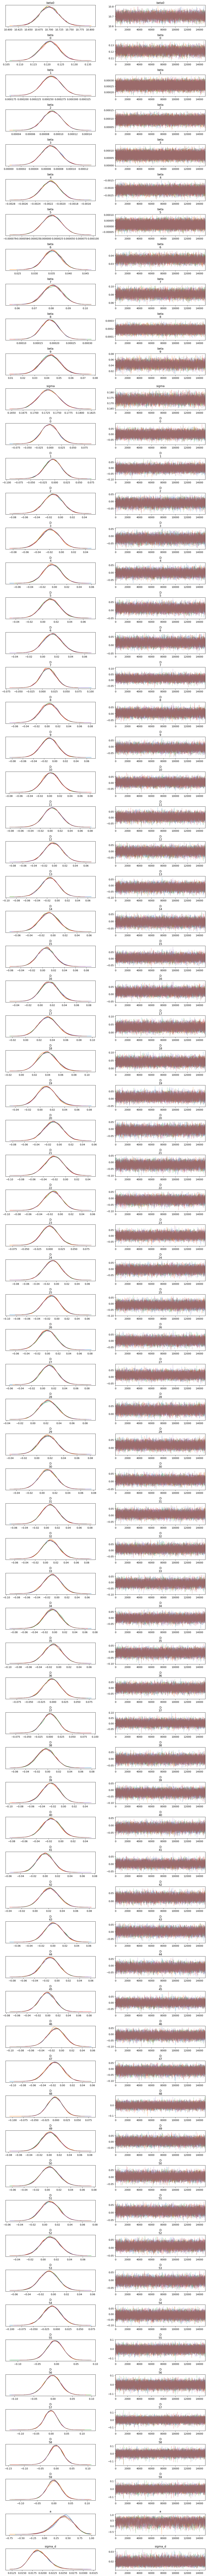

In [29]:
cmdstanpy_data = az.from_cmdstanpy(stan_fit)
az.rcParams["plot.max_subplots"] = 200
az.plot_trace(cmdstanpy_data, compact=False)
plt.tight_layout()
#plt.savefig("pure-bsts.png")
plt.show()